# Comparando diferentes métodos de boosting

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine

data = load_wine()


In [2]:
#vamos a dividir en 3 el conjunto de datos: 2 para HPO y uno para validar globalmente en el modelo

# Divide los datos en entrenamiento+validación y prueba
X_temp, X_test, y_temp, y_test = train_test_split(data.data, data.target, test_size=0.2)

# Divide los datos de entrenamiento+validación en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25)


In [3]:
# AdaBoost
pipe_ada = Pipeline([('classifier', AdaBoostClassifier())])

param_grid_ada = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]
}

grid_ada = GridSearchCV(pipe_ada, param_grid_ada, cv=5)
grid_ada.fit(X_train, y_train)
print("Mejores hiperparámetros AdaBoost:", grid_ada.best_params_)


Mejores hiperparámetros AdaBoost: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}


In [4]:
# Gradient Boosting Machine
pipe_gbm = Pipeline([('classifier', GradientBoostingClassifier())])

param_grid_gbm = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__max_depth': [3, 4, 5]
}

grid_gbm = GridSearchCV(pipe_gbm, param_grid_gbm, cv=5)
grid_gbm.fit(X_train, y_train)
print("Mejores hiperparámetros GBM:", grid_gbm.best_params_)


Mejores hiperparámetros GBM: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 150}


In [5]:
# XGBoost
pipe_xgb = Pipeline([('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))])

param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__max_depth': [3, 4, 5]
}

grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5)
grid_xgb.fit(X_train, y_train)
print("Mejores hiperparámetros XGBoost:", grid_xgb.best_params_)


C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.p

Mejores hiperparámetros XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}


**¿Como comprobar que esos modelos están o no sobre ajustados globalmente, a pesar de que se hayan encontrado los mejores hiperparametros?**

In [6]:
#Validar los modelos en el conjunto de validación:

# Después de encontrar los mejores hiperparámetros usando el conjunto de entrenamiento, se
# valida el rendimiento del modelo en el conjunto de validación.
# Esto  da una estimación imparcial de cómo se espera que el modelo funcione en datos no vistos.

# Para AdaBoost
train_score_ada = grid_ada.score(X_val, y_val)
test_score_ada = grid_ada.score(X_test, y_test)
print("AdaBoost Train Score:", train_score_ada)
print("AdaBoost Test Score:", test_score_ada)

# Para Gradient Boosting Machine
train_score_gbm = grid_gbm.score(X_val, y_val)
test_score_gbm = grid_gbm.score(X_test, y_test)
print("GBM Train Score:", train_score_gbm)
print("GBM Test Score:", test_score_gbm)

# Para XGBoost
train_score_xgb = grid_xgb.score(X_val, y_val)
test_score_xgb = grid_xgb.score(X_test, y_test)
print("XGBoost Train Score:", train_score_xgb)
print("XGBoost Test Score:", test_score_xgb)


AdaBoost Train Score: 0.9722222222222222
AdaBoost Test Score: 0.9444444444444444
GBM Train Score: 0.9722222222222222
GBM Test Score: 0.9166666666666666
XGBoost Train Score: 0.9444444444444444
XGBoost Test Score: 0.8888888888888888


C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aleph\anaconda3\lib\site-packages\xgboost\sklearn.p

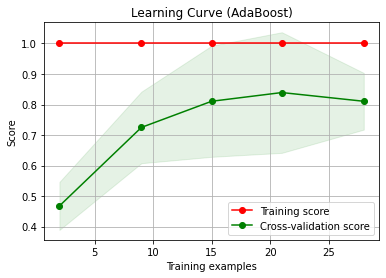

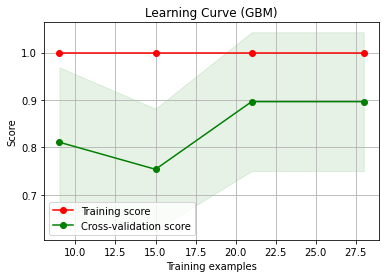

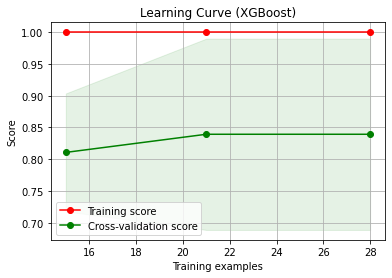

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    
    return plt

# Visualizar las curvas de aprendizaje
plot_learning_curve(grid_ada.best_estimator_, "Learning Curve (AdaBoost)", X_val, y_val, cv=5)
plot_learning_curve(grid_gbm.best_estimator_, "Learning Curve (GBM)", X_val, y_val, cv=5)
plot_learning_curve(grid_xgb.best_estimator_, "Learning Curve (XGBoost)", X_val, y_val, cv=5)

plt.show()


Las curvas de aprendizaje muestran el rendimiento del modelo en el conjunto de entrenamiento y en un conjunto de validación a medida que se aumenta la cantidad de datos de entrenamiento. En estas gráficas, si observas que hay una gran brecha entre las curvas de entrenamiento y validación, esto generalmente indica sobreajuste. Si ambas curvas convergen a un valor similar, el modelo generalmente está bien ajustado.

